In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import ast 

In [2]:
df_flood = pd.read_csv('../scenario0_floodTrue_heavy_truckFalse.csv')
df_ht = pd.read_csv('../scenario0_floodFalse_heavy_truckTrue.csv')
df_1 = pd.read_csv('../scenario0_floodFalse_heavy_truckFalse.csv')
df_0 = pd.read_csv('../scenario1_floodFalse_heavy_truckFalse.csv')

In [3]:
df_flood.head(5)

,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Delay dict
0,0,592517,399.173327,2199723,255.544029,"{'10690': 200.82093616808453, '12109': 188.226..."
1,0,430382,424.059111,2328868,270.987666,"{'12013': 207.7230868285194, '10060': 173.8882..."
2,0,544967,444.748662,2517999,292.858688,"{'10278': 98.99706010399743, '12015': 95.02306..."
3,0,487543,428.645574,2390295,278.038269,"{'11557': 87.7963792202034, '12519': 86.572933..."
4,0,943789,529.972717,3392775,405.980017,"{'10062': 216.4412345767853, '11543': 180.0379..."


In [218]:
#histoplot the Average_driving_time
def histoplot(df, title):
    plt.figure(figsize=(8, 5))
    ax = sns.histplot(df['Average_driving_time'], bins=10, kde=True)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Average Driving Time (min)')
    ax.set_ylabel('Frequency')
    #plt.grid()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

def histoplot_three(df_list, titles):
    """
    Plots three histograms in one row.

    Parameters:
    - df_list: List of DataFrames, each containing the 'Average_driving_time' column.
    - titles: List of titles for the three plots.
    """
    if len(df_list) != 3 or len(titles) != 3:
        raise ValueError("You must provide exactly 3 DataFrames and 3 titles.")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create a 1x3 grid of subplots

    for i, ax in enumerate(axes):
        sns.histplot(df_list[i]['Average_driving_time'], bins=10, kde=True, ax=ax)
        ax.set_title(titles[i], fontweight='bold')
        ax.set_xlabel('Average Driving Time (min)')
        ax.set_ylabel('Frequency')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

def histoplot_length(df, title):
    plt.figure(figsize=(5, 3))
    ax = sns.histplot(df['length'], bins=30, kde=True)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Length (m)')
    ax.set_ylabel('Frequency')
    #plt.grid()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

def histoplot_truck(df, title):
    plt.figure(figsize=(5, 3))
    ax = sns.histplot(df['heavy_truck_normalized'], bins=30, kde=True)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('value')
    ax.set_ylabel('Frequency')
    #plt.grid()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

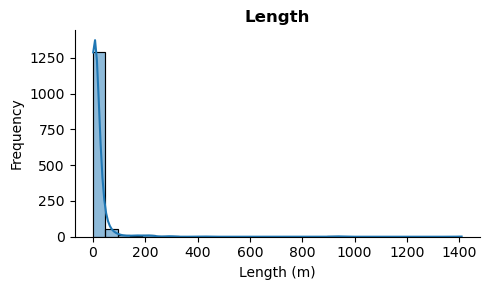

In [214]:
histoplot_length(df[df['model_type']=='bridge'], 'Length')

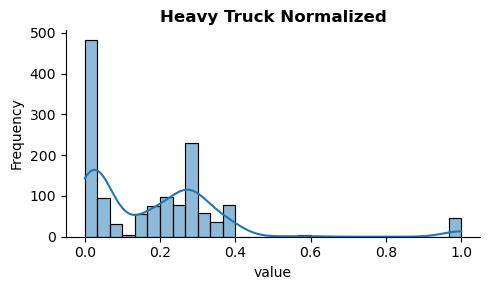

In [219]:
histoplot_truck(df[df['model_type']=='bridge'], 'Heavy Truck Normalized')

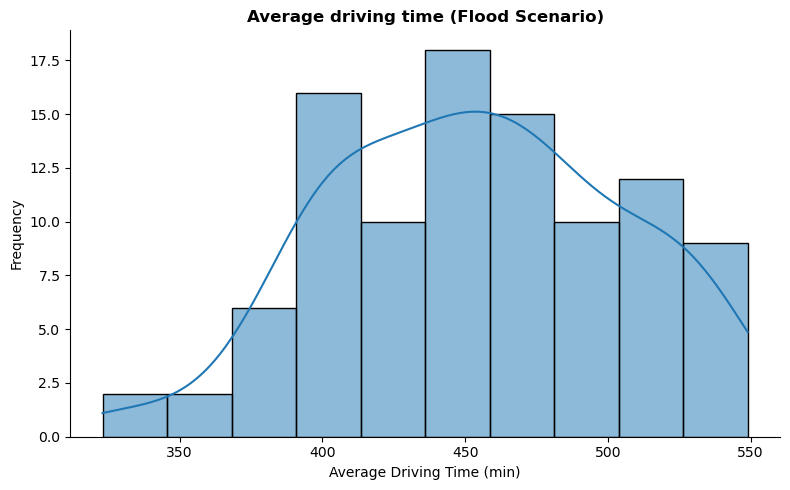

In [188]:
histoplot(df_flood, 'Average driving time (Flood Scenario)')

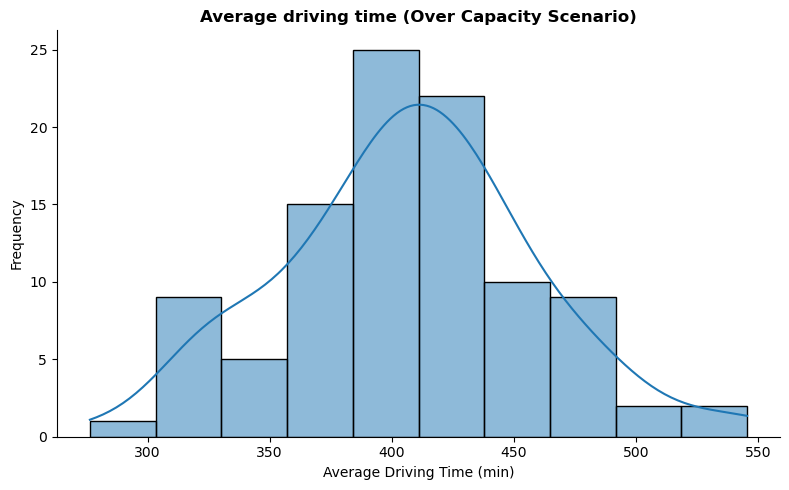

In [189]:
histoplot(df_ht, 'Average driving time (Over Capacity Scenario)')

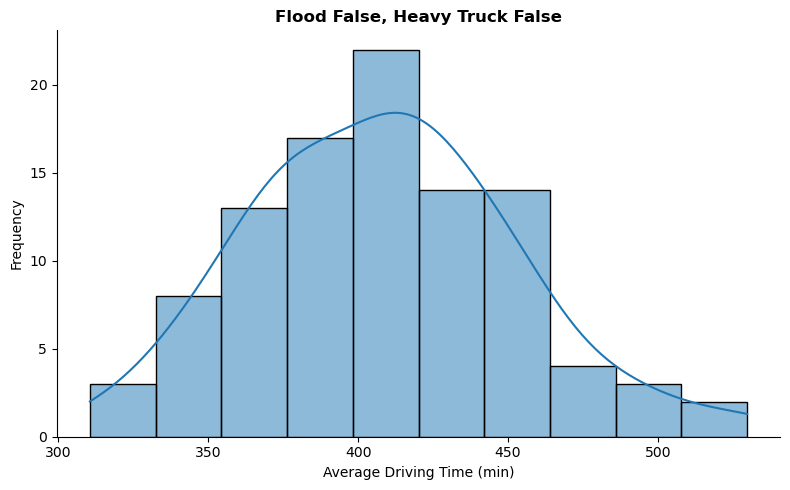

In [190]:
histoplot(df_1, 'Flood False, Heavy Truck False')

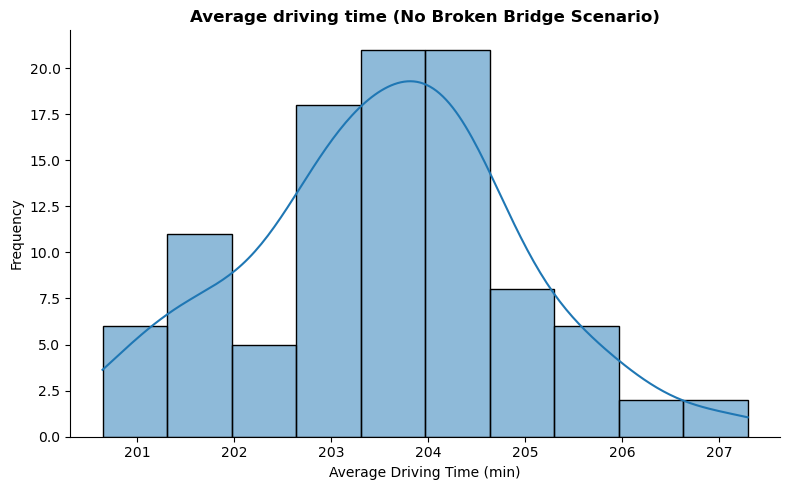

In [191]:
histoplot(df_0, 'Average driving time (No Broken Bridge Scenario)')

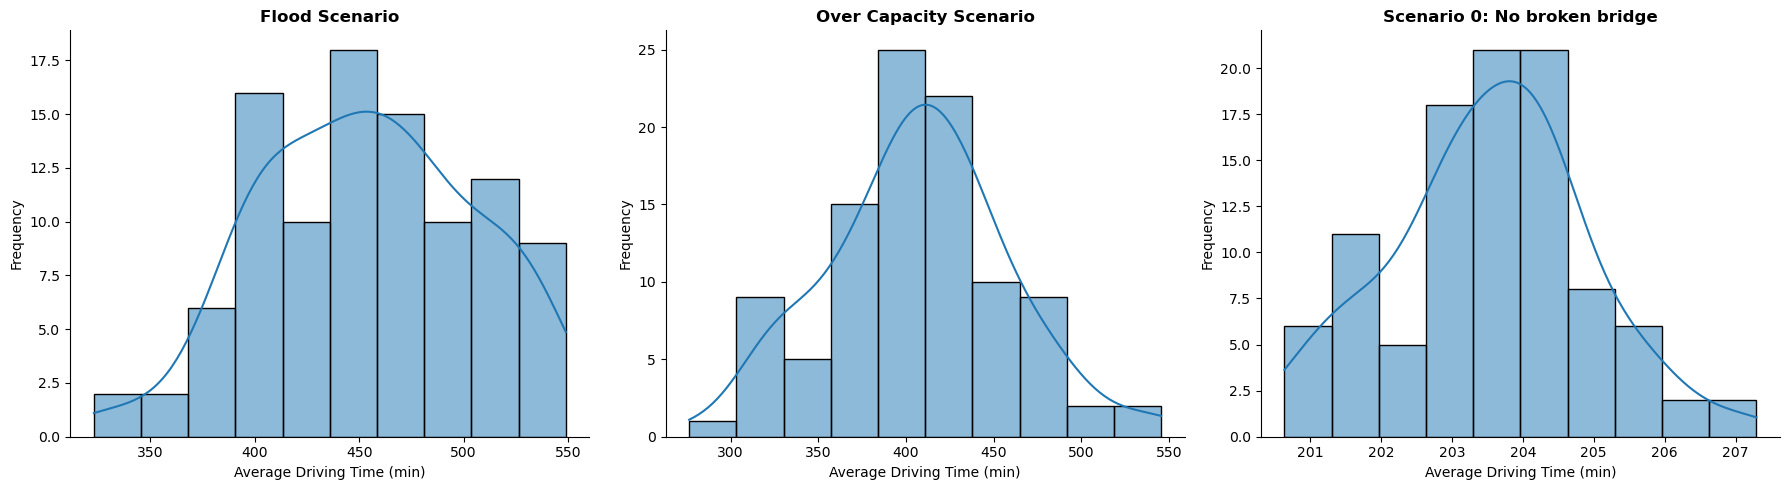

In [193]:
titles = ['Flood Scenario', 'Over Capacity Scenario', 'Scenario 0: No broken bridge']

histoplot_three([df_flood, df_ht, df_0], titles)

In [9]:
# df['Average_driving_time] average
def average_driving_time(df):
    return df['Average_driving_time'].mean()

In [10]:
average_driving_time(df_flood), average_driving_time(df_ht), average_driving_time(df_1), average_driving_time(df_0)

(453.74118759044876, 407.0266420719449, 408.21777981068334, 203.537417963211)

In [21]:
df_flood['Delay dict'] = df_flood['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_ht['Delay dict'] = df_ht['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_1['Delay dict'] = df_1['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_0['Delay dict'] = df_0['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [22]:
def get_mean_delay_dict(df):
    bridge_delays = defaultdict(lambda: [0, 0])  # {bridge_id: [total_delay, count]}

    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            for bridge_id, delay in delays.items():
                bridge_delays[bridge_id][0] += delay  # Sum delay
                bridge_delays[bridge_id][1] += 1  # Count occurrences

    # Compute average delay
    average_delays = {bridge: total / count for bridge, (total, count) in bridge_delays.items()}
    return average_delays

In [25]:
flood_dict = get_mean_delay_dict(df_flood)
ht_dict = get_mean_delay_dict(df_ht)
one_dict = get_mean_delay_dict(df_1)
zero_dict = get_mean_delay_dict(df_0)

In [59]:
from collections import Counter

def get_most_popular_bridges(df):
    bridge_counts = Counter()

    # Ensure 'Delay dict' is properly formatted
    df['Delay dict'] = df['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Iterate over each row and count occurrences
    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            bridge_counts.update(delays.keys())

    # Get the 10 most common bridge IDs
    top_10_popular = [bridge for bridge, _ in bridge_counts.most_common(10)]

    return top_10_popular

In [60]:
flood_pop = get_most_popular_bridges(df_flood)
ht_pop = get_most_popular_bridges(df_ht)
one_pop = get_most_popular_bridges(df_1)
zero_pop = get_most_popular_bridges(df_0)

print(flood_pop)
print(ht_pop)
print(one_pop)
print(zero_pop)

['12941', '11066', '12519', '12562', '10858', '10222', '12969', '10166', '12556', '11607']
['10944', '10954', '10858', '11248', '12604', '12969', '11018', '12840', '11066', '12519']
['12941', '12840', '10954', '10858', '10944', '11018', '12604', '11248', '11066', '12969']
[]


In [ ]:
set_flood = set(flood_pop)
set_ht = set(ht_pop)
set_1 = set(one_pop)

# Find objects that appear in more than one list
common_objects = (set_flood & set_ht) | (set_ht & set_1) | (set_flood & set_1)

# Print the result
print("Objects that appear in more than one list:", common_objects)

Objects that appear in more than one list: {'11066', '12519', '10954', '12969', '12604', '11018', '10944', '12840', '11248', '10858', '12941'}


In [215]:
set_flood_acc = set(flood_accumulation)
set_ht_acc = set(ht_accumulation)

commons = (set_flood_acc & set_ht_acc)

# Print the result
print("Objects that appear in more than one list:", commons)

Objects that appear in more than one list: {'11465', '10954', '12013', '11543', '11435', '10690'}


In [32]:
def get_top_10_avg_delay(df):
    bridge_delays = defaultdict(lambda: [0, 0])  # {bridge_id: [total_delay, count]}

    # Ensure 'Delay dict' is properly formatted
    df['Delay dict'] = df['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Iterate through 'Delay dict' column
    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            for bridge_id, delay in delays.items():
                bridge_delays[bridge_id][0] += delay  # Sum delay
                bridge_delays[bridge_id][1] += 1  # Count occurrences

    # Compute average delay per bridge
    average_delays = {bridge: total / count for bridge, (total, count) in bridge_delays.items()}

    # Get the top 10 bridges with the highest average delay
    top_10_avg_delay = dict(sorted(average_delays.items(), key=lambda x: x[1], reverse=True)[:10])

    return top_10_avg_delay

In [33]:
flood_top_10 = get_top_10_avg_delay(df_flood)
ht_top_10 = get_top_10_avg_delay(df_ht)
one_top_10 = get_top_10_avg_delay(df_1)
zero_top_10 = get_top_10_avg_delay(df_0)
print(flood_top_10)
print(ht_top_10)
print(one_top_10)
print(zero_top_10)

{'10114': 224.01173834005206, '10546': 196.25821488253413, '11435': 194.5196005134798, '10468': 194.06258233758587, '10062': 192.53014144642495, '10060': 189.16747463982492, '10690': 188.76702298652273, '11481': 184.8278473491688, '12013': 182.0024795095996, '11465': 177.64105326826973}
{'11481': 205.62324827061906, '10062': 190.24195134019374, '10008': 187.22455728628756, '12109': 179.98002554454357, '10060': 179.30650689308462, '11465': 179.05774581921128, '10690': 176.1057594328908, '12013': 174.40816958651564, '11435': 172.31209892119998, '11543': 164.11881307945862}
{'10062': 195.60098328052547, '11435': 186.32040047988198, '10068': 179.49515431356414, '12013': 177.66861770394482, '11465': 177.54977700677497, '12109': 176.06654167108255, '10060': 173.50728686655998, '10690': 171.3526936733422, '10546': 160.29043336428782, '11543': 157.4180019579455}
{}


In [152]:
def plot_top_10_avg_delay_4(dicts, titles):
    """
    Plots top 10 average delay for 4 dictionaries in a 2x2 grid.

    Parameters:
    - dicts: List of 4 dictionaries, each containing bridge IDs as keys and average delay times as values.
    - titles: List of 4 titles for the subplots.
    """
    if len(dicts) != 4 or len(titles) != 4:
        raise ValueError("You must provide exactly 4 dictionaries and 4 titles.")

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        top_10_dict = dicts[i]
        sns.barplot(x=list(top_10_dict.keys()), y=list(top_10_dict.values()), ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel('Bridge ID')
        ax.set_ylabel('Time (min)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid()

    plt.tight_layout()
    plt.show()

def plot_top_10_avg_delay_2(dicts, titles):
    """
    Plots top 10 average delay for 4 dictionaries in a 2x2 grid.

    Parameters:
    - dicts: List of 4 dictionaries, each containing bridge IDs as keys and average delay times as values.
    - titles: List of 4 titles for the subplots.
    """
    if len(dicts) != 2 or len(titles) != 2:
        raise ValueError("You must provide exactly 4 dictionaries and 4 titles.")

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        top_10_dict = dicts[i]
        sns.barplot(x=list(top_10_dict.keys()), y=list(top_10_dict.values()), ax=ax, color='#A1D6E2')
        ax.set_title(titles[i], fontweight='bold')
        ax.set_xlabel('Bridge ID')
        ax.set_ylabel('Time (min)')
        ax.tick_params(axis='x', rotation=45)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

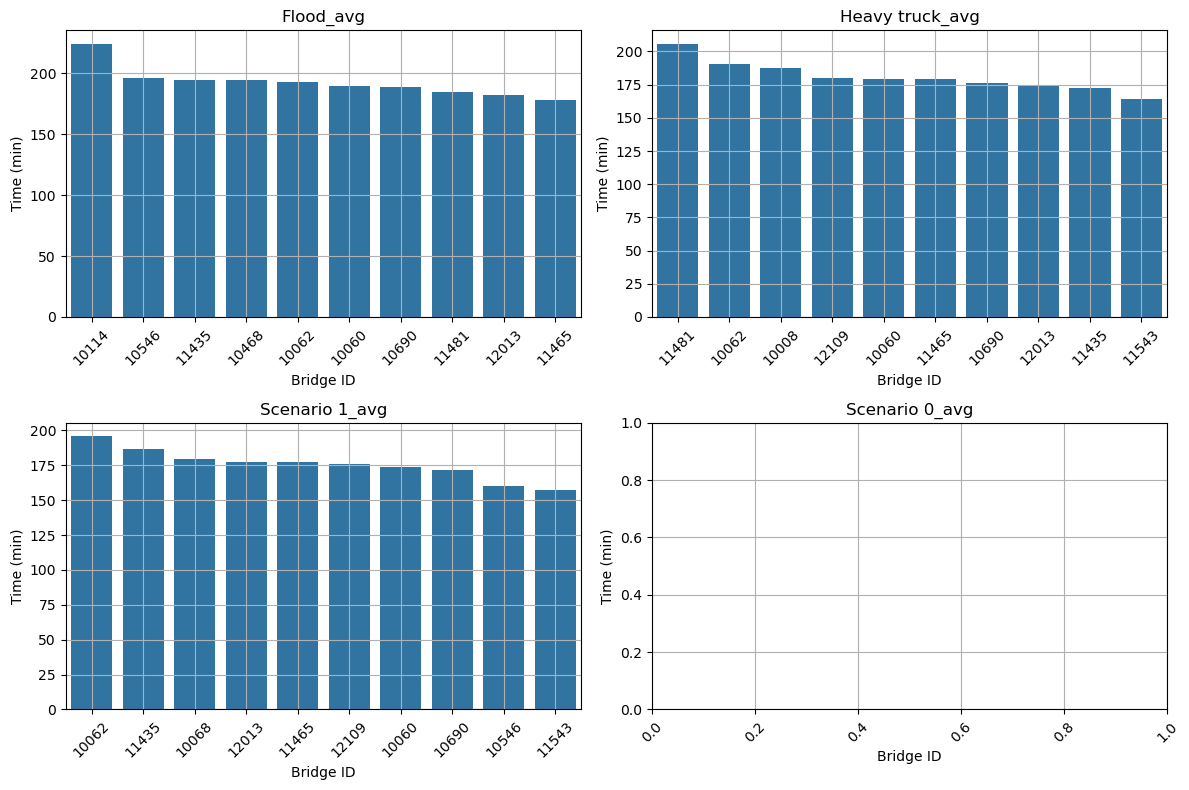

In [63]:
titles = ['Flood_avg', 'Heavy truck_avg', 'Scenario 1_avg', 'Scenario 0_avg']

# Call the function
plot_top_10_avg_delay_4([flood_top_10, ht_top_10, one_top_10, zero_top_10], titles)

'11066', '12519', '12969', '10858

In [34]:
def get_top_10_accumulation_delay(df):
    bridge_delays = defaultdict(float)  # {bridge_id: total_delay}

    # Ensure 'Delay dict' is properly formatted
    df['Delay dict'] = df['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Iterate through 'Delay dict' column
    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            for bridge_id, delay in delays.items():
                bridge_delays[bridge_id] += delay  # Accumulate total delay

    # Get the top 10 bridges with the highest accumulated delay
    top_10_accumulation_delay = dict(sorted(bridge_delays.items(), key=lambda x: x[1], reverse=True)[:10])

    return top_10_accumulation_delay

In [35]:
flood_accumulation = get_top_10_accumulation_delay(df_flood)
ht_accumulation = get_top_10_accumulation_delay(df_ht)
one_accumulation = get_top_10_accumulation_delay(df_1)
zero_accumulation = get_top_10_accumulation_delay(df_0)
print(flood_accumulation)
print(ht_accumulation)
print(one_accumulation)
print(zero_accumulation)

{'11543': 3436.766987260438, '11435': 3112.3136082156766, '10690': 3020.2723677843637, '12941': 2557.5490442930804, '12013': 2366.0322336247946, '11465': 2309.3336924875066, '11066': 2189.9969958647903, '12519': 2082.692171493342, '10954': 1845.5879491059602, '12840': 1785.2795595259686}
{'11465': 3760.212662203437, '10690': 3698.2209480907068, '12013': 3139.3470525572816, '10954': 2857.4163350654967, '11435': 2240.0572859756, '10944': 2097.869624625947, '11543': 1969.4257569535034, '11018': 1511.7763373280475, '10540': 1459.126878040701, '10034': 1418.5742731144646}
{'10954': 2776.5603965262294, '11435': 2235.844805758584, '10690': 2227.5850177534485, '12840': 2091.703956908428, '12013': 1954.354794743393, '12941': 1934.1413786184246, '11543': 1889.0160234953462, '10034': 1807.8088663514595, '12015': 1782.6445892638262, '11321': 1773.93430063086}
{}


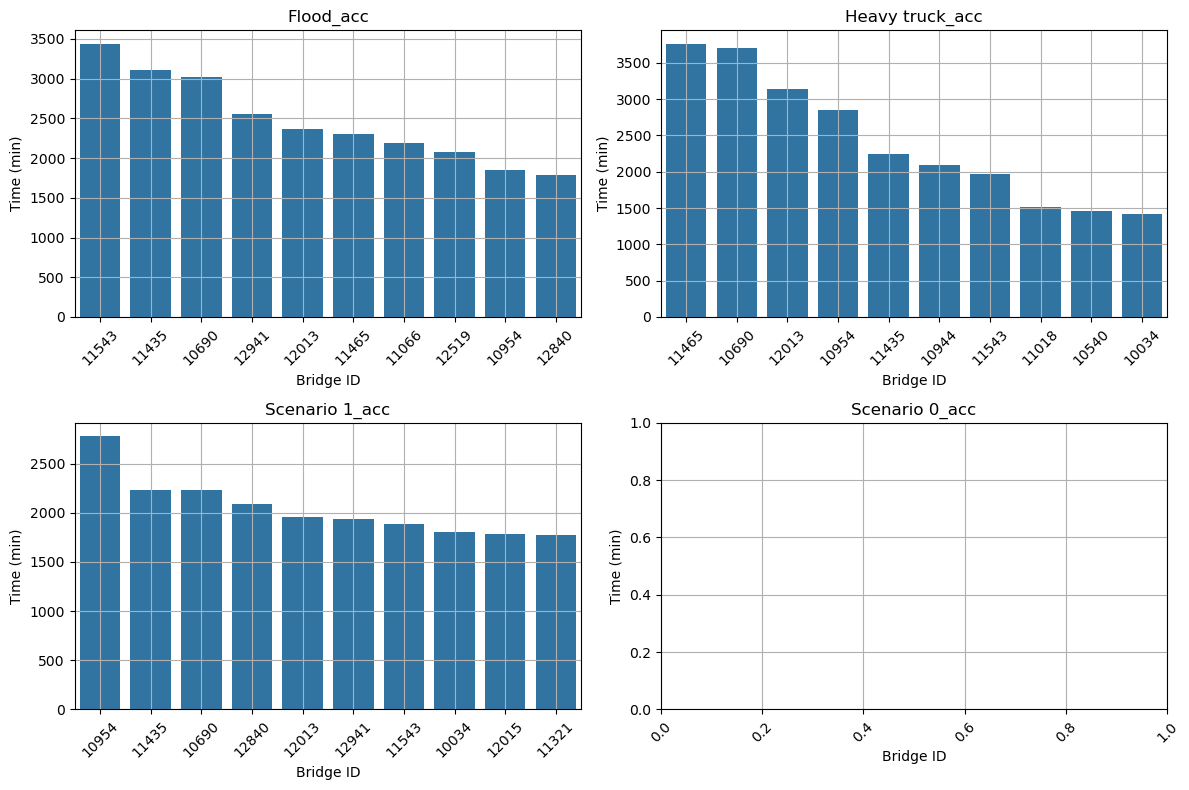

In [62]:
titles = ['Flood_acc', 'Heavy truck_acc', 'Scenario 1_acc', 'Scenario 0_acc']

# Call the function
plot_top_10_avg_delay_4([flood_accumulation, ht_accumulation, one_accumulation, zero_accumulation], titles)

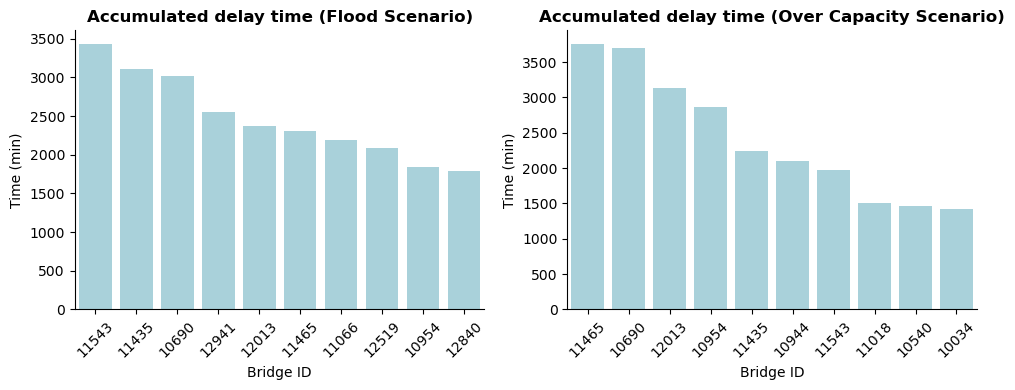

In [153]:
plot_top_10_avg_delay_2([flood_accumulation, ht_accumulation], ['Accumulated delay time (Flood Scenario)', 'Accumulated delay time (Over Capacity Scenario)'])

'11066', '12519', '12969', '10858

In [120]:
df[df['id']==10954]

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,FLOODCAT,Flood_condition
954,954,61.3,D,21.299745,92.097477,NaN,bridge,10954,N1,NaN,411.98941,5820.0,24.0,0.019721,NaN,NaN,0.0,0.0_D


In [65]:
df = pd.read_csv('../data/processed/demo_100_complete.csv')

In [66]:
df.head(5)

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,FLOODCAT
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.0040,21537.0,660.0,0.542317,3.0,0.153071,0.0
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.8040,19357.0,402.0,0.330320,NaN,NaN,0.0
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.8153,19357.0,402.0,0.330320,NaN,NaN,0.0
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.9403,16657.0,85.0,0.069844,NaN,NaN,0.0
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.9469,16657.0,85.0,0.069844,NaN,NaN,0.0


In [81]:
df.describe()

,Unnamed: 0,length,lat,lon,id,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,FLOODCAT
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,0.0,2837.000000,2837.000000,2837.000000,2837.000000,14.000000,14.000000,2837.000000
mean,1431.077194,375.106306,23.212302,91.552454,11426.873458,NaN,192.624064,8977.180120,225.446951,0.185248,7.928571,0.071429,2.033839
std,841.075788,688.767883,1.280731,0.516558,840.803796,NaN,147.443157,3896.008658,242.184664,0.199001,2.786348,0.047365,2.188149
min,0.000000,0.000000,20.862917,90.358222,10000.000000,NaN,0.004000,2628.000000,0.000000,0.000000,2.000000,0.018678,0.000000
25%,709.000000,5.200000,22.030283,91.150641,10705.000000,NaN,49.977260,5820.000000,24.000000,0.019721,7.000000,0.037875,0.000000
50%,1418.000000,64.000000,23.666712,91.590884,11414.000000,NaN,171.129710,8203.000000,205.000000,0.168447,8.000000,0.064929,2.000000
75%,2127.000000,502.000000,24.266580,92.063317,12120.000000,NaN,308.442640,11793.000000,338.000000,0.277732,10.000000,0.089176,4.000000
max,3011.000000,9953.000000,25.180537,92.298716,13011.000000,NaN,475.861360,24659.000000,1217.000000,1.000000,11.000000,0.175261,8.000000


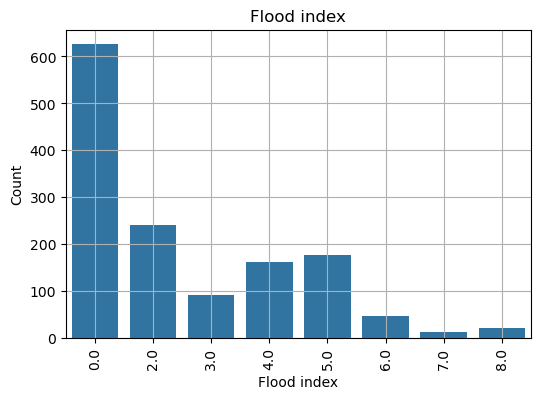

In [105]:
# barplot [model_type] == bridge FLOODCAT
plt.figure(figsize=(6, 4))
sns.countplot(x='FLOODCAT', data=df[df['model_type'] == 'bridge'])
plt.title('Flood index')
plt.xlabel('Flood index')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid()
plt.show()

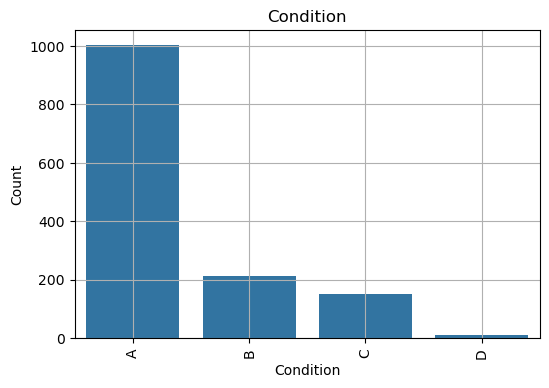

In [107]:
# barplot [model_type] == bridge FLOODCAT
plt.figure(figsize=(6, 4))
sns.countplot(x='condition', data=df)
plt.title('Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [94]:
# show rows ['FLOODCAT'] == '8' and ['condition'] == D
df_floodcat = df[(df['FLOODCAT'] == 6) & (df['condition'] == 'C')]
df_floodcat

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability,FLOODCAT
1495,1495,3.15,C,24.037023,91.019241,NaN,bridge,11495,N2,NaN,77.82399,10615.0,329.0,0.270337,NaN,NaN,6.0
1497,1497,79.75,C,24.038132,91.024977,NaN,bridge,11497,N2,NaN,78.50974,10615.0,329.0,0.270337,NaN,NaN,6.0
1533,1533,43.00,C,24.054803,91.146191,NaN,bridge,11533,N2,NaN,92.55186,11646.0,205.0,0.168447,NaN,NaN,6.0
1543,1543,203.75,C,24.049033,91.174880,NaN,bridge,11543,N2,NaN,95.85706,11646.0,205.0,0.168447,NaN,NaN,6.0
1547,1547,4.00,C,24.042791,91.185822,NaN,bridge,11547,N2,NaN,97.49901,11646.0,205.0,0.168447,NaN,NaN,6.0
1553,1553,64.10,C,24.042970,91.204550,NaN,bridge,11553,N2,NaN,99.49191,11646.0,205.0,0.168447,NaN,NaN,6.0
1557,1557,27.03,C,24.041972,91.213833,NaN,bridge,11557,N2,NaN,100.62364,11646.0,205.0,0.168447,NaN,NaN,6.0


In [95]:
# add a column combining ['FLOODCAT'] and ['condition']
df['Flood_condition'] = df['FLOODCAT'].astype(str) + '_' + df['condition']

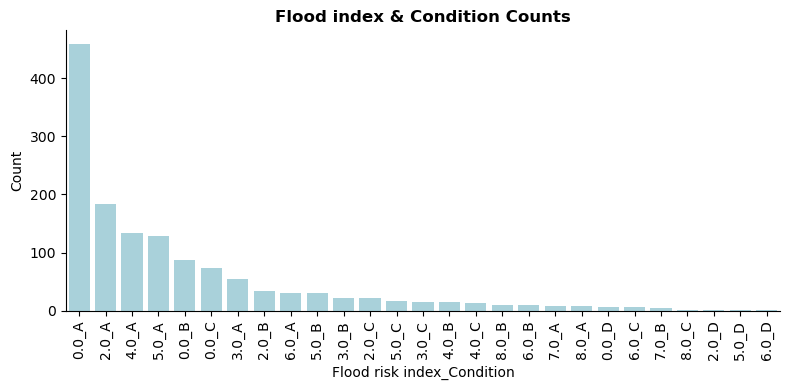

In [167]:
order = df['Flood_condition'].value_counts().index

plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Flood_condition', data=df, color='#A1D6E2', order=order)
ax.set_title('Flood index & Condition Counts', fontweight='bold')
ax.set_xlabel('Flood risk index_Condition')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

- 0: Not flood prone
- 1: Severe river flooding
- 2: Moderate river flooding -> 2D, 2C
- 3: Low river flooding
- 4: Severe Flash Flooding -> 4C
- 5: Moderate Flash Flooding -> 5C, 5D
- 6: Low Flash Flooding
- 7: Severe Tidal Surge -> 7A, 7B
- 8: Moderate Tidal Surge -> 8C